## Componentes principales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Categorizando la variable quality
clase = []
for i in df['quality']:
    if i <= 6.5:
        clase.append('1')
    elif i > 6.5:
        clase.append('2')
df['clase'] = clase

In [6]:
# Dividir la data en X e Y
x = df.iloc[:,:11]
y = df['quality']

In [7]:
# Escalando la data, necesario para PCA
from sklearn.preprocessing import StandardScaler
names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
scl = StandardScaler()
x_esc = scl.fit_transform(x)
#x = pd.DataFrame(scl.fit_transform(x), columns=names)
#x.head()

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_esc)

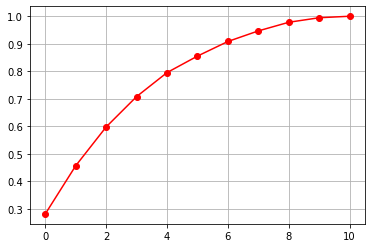

In [35]:
# Grafica de explicación de la varianza y numero de componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()
plt.savefig('p2_1.png')

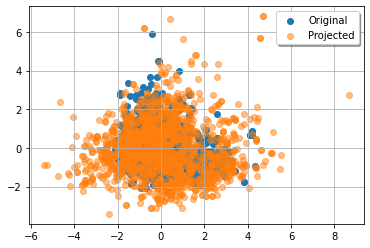

In [29]:
# Tomaremos 6 componentes principales ya que estos explican el 90% de la variacion de la data
pca_new = PCA(n_components=6)
x_new = pca_new.fit_transform(x_esc)
plt.scatter(x_esc[:,0],x_esc[:,1], label = "Original")
plt.scatter(x_new[:,0], x_new[:,1], label = "Projected", alpha= 0.5)
plt.legend(loc="best", fancybox=True, shadow=True)
plt.grid(True)
plt.savefig('p2_2.png')

## Clustering

In [14]:
from sklearn.cluster import KMeans

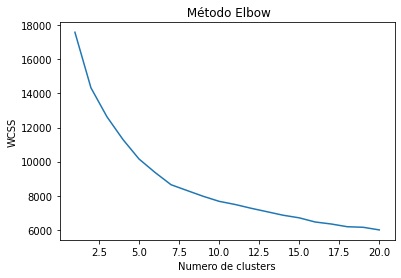

In [32]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_esc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title(' Método Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.savefig('p2_3.png')

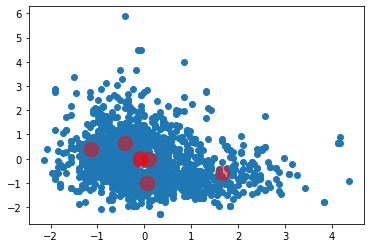

In [33]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x_esc)
plt.scatter(x_esc[:,0], x_esc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', alpha = 0.5)
plt.savefig('p2_4.png')

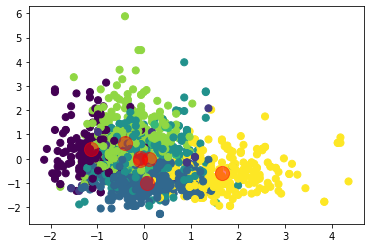

In [34]:
plt.scatter(x_esc[:, 0], x_esc[:, 1], c=pred_y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.savefig('p2_5.png')